#Assignment 1 - Linear algebra

한 학기 동안 배운 것을 Programming하기 위해 가장 기초인 Linear algebra를 직접 구현해보겠습니다.

# Chapter 1, Introduction to vectors

## 1.1 Vectors and Linear Combinations

이 챕터에서는 벡터의 덧셈, Scalar와의 곱셈을 통한 Linear Combination에 대해 다룹니다.
그에 맞추어 코드를 직접 구현해보겠습니다

In [56]:
def vector_addition(Va, Vb):
    if len(Va) != len(Vb):
        print("Invalid vector addition!")
        # 두 벡터의 components 개수가 같아야 계산이 가능함.
    else:
        answer = list()
        for i in range(len(Va)):
            answer.append(Va[i] + Vb[i])
        return answer; # 벡터끼리 값을 더해서 반환
    
def vector_multiplication(Va, c):
        answer = list()
        for i in range(len(Va)):
            answer.append(Va[i] * c)
        return answer; # 벡터에 scalar를 곱해서 반환

def linear_combination(Va, Vb, equation):
    constant_string1 = (equation[0:equation.find("v")])
    constant_string2 = (equation[max(equation.find("+"), equation.find("-")):equation.find("w")])
    #equation에서 multiply될 값을 문자열로 찾아낸다
    
    constant1 = 0;
    constant2 = 0;
    #각각의 constant를 0으로 일단 초기화
    
    if constant_string1 == '':
        constant1 = 1
    else :
        constant1 = float(constant_string1)
        
    if constant_string2 == '+':
        constant2 = 1
    elif constant_string2 == '-':
        constant2 = -1
    else :
        constant2 = float(constant_string2)
    #linear combination의 상수를 추출해내는 과정
    
    return vector_addition(vector_multiplication(Va, constant1), vector_multiplication(Vb, constant2))
#계산해서 반환한다
    
        
print("vector v의 components을 입력해주세요")
vector_a = list(map(float, input().split()))
print()

print("vector w의 components을 입력해주세요")
vector_b = list(map(float, input().split()))
print()

      
print("vector v : ")
print(vector_a)
print()

print("vector w : ")
print(vector_b)
print()

input_equation = input("v와 w의 linear combination 식을 입력해주세요(ex : 4v+3w) : ")

answer = linear_combination(vector_a, vector_b, input_equation)

print(answer)

vector v의 components을 입력해주세요
1 3

vector w의 components을 입력해주세요
2 7

vector v : 
[1.0, 3.0]

vector w : 
[2.0, 7.0]

v와 w의 linear combination 식을 입력해주세요(ex : 4v+3w) : 3v+5w
[13.0, 44.0]


이는 본인이 짠 프로그램이며, 아래의 Numpy 및 Matploblib을 통해서도 같은 결과를 확인 할 수 있습니다.

첫 번째 벡터를 공백으로 구분하여 입력하세요: 1 3
두 번째 벡터를 공백으로 구분하여 입력하세요: 2 7
각 벡터에 대한 계수를 공백으로 구분하여 입력하세요: 3 5


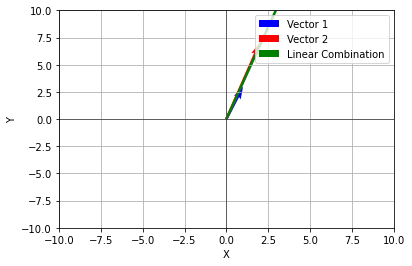

선형 결합 결과: [13. 44.]


In [57]:
import numpy as np
import matplotlib.pyplot as plt

def main():
    # 벡터 입력 받기
    vector1 = np.array(input("첫 번째 벡터를 공백으로 구분하여 입력하세요: ").split(), dtype=float)
    vector2 = np.array(input("두 번째 벡터를 공백으로 구분하여 입력하세요: ").split(), dtype=float)
    
    # 선형 결합식 입력 받기
    coefficients = np.array(input("각 벡터에 대한 계수를 공백으로 구분하여 입력하세요: ").split(), dtype=float)
    
    # 입력된 계수와 벡터로 선형 결합 계산
    result = coefficients[0] * vector1 + coefficients[1] * vector2
    
    # 원점에서 벡터 그리기
    plt.quiver(0, 0, vector1[0], vector1[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Vector 1')
    plt.quiver(0, 0, vector2[0], vector2[1], angles='xy', scale_units='xy', scale=1, color='red', label='Vector 2')
    plt.quiver(0, 0, result[0], result[1], angles='xy', scale_units='xy', scale=1, color='green', label='Linear Combination')
    
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid()
    plt.show()
    
    print("선형 결합 결과:", result)

if __name__ == "__main__":
    main()

## 1.2 Length and Dot Products

이 장에서는 벡터의 내적, 그를 통한 Length, 단위 벡터에 대해 다룹니다.
또한 내적의 정의에서 유도된 벡터 사이의 코사인 값, 각도를 구하는 프로그램에 대해서도 구현해 보겠습니다.

In [58]:
import math
import numpy as np

def dot_product(Va, Vb):
    answer = 0
    
    if len(Va) != len(Vb):
        print("Invalid dot product!")
        # 두 벡터의 components 개수가 같아야 계산이 가능함.
    else:
        answer = 0
        for i in range(len(Va)):
            answer += Va[i] * Vb[i]
    return answer #벡터의 덧셈 과정과 거의 같습니다. 다만 각각의 덧셈이 아닌 곱셈, 벡터가 아닌 스칼라를 반환한다는 점이 다릅니다.

def vector_length(Va):
    return math.sqrt(dot_product(Va, Va))
#정의대로 자기 자신을 내적후 제곱근을 취합니다

def unit_vector(Va):
    len_Va= vector_length(Va)
    answer = list()
    
    for i in range(len(Va)):
        answer.append(Va[i]/len_Va)
    
    return answer
#역시 정의에 따라 각 원소를 length에 나누어 반환합니다.

def inner_angle(Va, Vb):
    cos_angle = dot_product(Va, Vb)/(vector_length(Va) * vector_length(Vb))
    #코사인 값을 정의대로 계산합니다.
    
    return np.degrees(math.acos(cos_angle))#역함수를 취해 사이각 값을 반환합니다(단위 : º)

print("vector v의 components을 입력해주세요")
vector_a = list(map(float, input().split()))

print("vector w의 components을 입력해주세요")
vector_b = list(map(float, input().split()))

      
print("vector v : ")
print(vector_a)
print()
print("vector w : ")
print(vector_b)
print()

print("v와 w의 내적값:")
print(dot_product(vector_a, vector_b))
print()

print("vector v의 unit vector:")
print(unit_vector(vector_a))
print()

print("vector w의 unit vector:")
print(unit_vector(vector_b))
print()

print("vector v와 w의 사이각(단위 : º)")
print(inner_angle(vector_a, vector_b))

vector v의 components을 입력해주세요
4 2
vector w의 components을 입력해주세요
-1 2
vector v : 
[4.0, 2.0]

vector w : 
[-1.0, 2.0]

v와 w의 내적값:
0.0

vector v의 unit vector:
[0.8944271909999159, 0.4472135954999579]

vector w의 unit vector:
[-0.4472135954999579, 0.8944271909999159]

vector v와 w의 사이각(단위 : º)
90.0


## 1.3 Matrices

이번 chapter에서는 Matrix와 vector의 곱에 대해 다룬다.

In [59]:
import sys

def dot_product(Va, Vb):
    answer = 0
    
    if len(Va) != len(Vb):
        print("Invalid dot product!")
    else:
        answer = 0
        for i in range(len(Va)):
            answer += Va[i] * Vb[i]
        return answer

def matrix_vector_multiplication(Ma, Va):
    if len(Ma) != len(Va):
        print("Invalid multiplication")
        #만약 Matrix의 열과 vector의 행의 값이 다르다면 Invalid하다고 출력한다.
    
    else:   
        answer = list()
        for i in range(len(Ma)):
            row_of_answer = dot_product(Ma[i], Va)
            answer.append(row_of_answer)
        return answer
## 책에 나와 있는 방법대로 구현한다.
    
def print_matrix(matrix):
    rows = len(matrix)
    cols = len(matrix[0])
    
    for i in range(rows):
        for j in range(cols):
            print(matrix[i][j], end ="\t")
        print()
## matrix를 출력하기 위한 함수를 만든다
    
matrix = list()

rows = int(input("Matrix A 행 수를 입력하세요: "))
cols = int(input("Matrix A 열 수를 입력하세요: "))

for i in range(rows):
        row = input(f"행 {i+1}을 공백으로 구분하여 입력하세요: ").split()
        if len(row) != cols:
            print("열 수와 입력된 값의 개수가 일치하지 않습니다.")
            sys.exit(1)
        else:
            matrix.append([float(val) for val in row])
print()

print("vector v의 components을 입력해주세요")
vector_a = list(map(float, input().split()))
print()

print("Matrix A : ")
print_matrix(matrix)
print()

print("vector v : ")
print(vector_a)
print()

print("Av")
print(matrix_vector_multiplication(matrix, vector_a))

Matrix A 행 수를 입력하세요: 3
Matrix A 열 수를 입력하세요: 3
행 1을 공백으로 구분하여 입력하세요: 1 0 0
행 2을 공백으로 구분하여 입력하세요: 1 1 0
행 3을 공백으로 구분하여 입력하세요: 1 1 1

vector v의 components을 입력해주세요
1 1 1

Matrix A : 
1.0	0.0	0.0	
1.0	1.0	0.0	
1.0	1.0	1.0	

vector v : 
[1.0, 1.0, 1.0]

Av
[1.0, 2.0, 3.0]
